In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('ZBZ20-CBOT5sec.csv')

In [6]:
data.head()

Date      Time       Open       High        Low       Last   Volume  \
0  29/06/2020  01:00:00  179.28125  179.28125  179.28125  179.28125        5   
1  29/06/2020  01:00:05  179.28125  179.28125  179.28125  179.28125        4   
2  29/06/2020  01:00:10  179.28125  179.28125  179.28125  179.28125        1   
3  29/06/2020  01:00:25  179.25000  179.25000  179.25000  179.25000       11   
4  29/06/2020  01:00:30  179.25000  179.25000  179.25000  179.25000        1   

    # of Trades   OHLC Avg    HLC Avg     HL Avg   Bid Volume   Ask Volume  \
0             3  179.28125  179.28125  179.28125            5            0   
1             3  179.28125  179.28125  179.28125            1            3   
2             1  179.28125  179.28125  179.28125            1            0   
3             9  179.25000  179.25000  179.25000           11            0   
4             1  179.25000  179.25000  179.25000            1            0   

    Volume_1  
0          5  
1          4  
2          1  
3         11  
4          1

In [42]:
data['1MinSettleChange'] = [data.loc[ei, ' Open']-data.loc[ei-12, ' Open'] if data.loc[ei, ' Time']=='20:00:00' else 0 for ei in data.index]

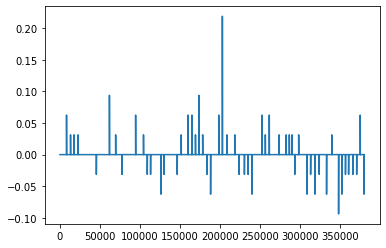

In [43]:
plt.plot(data['1MinSettleChange'])

In [44]:
data['FadeDirection'] = [1 if data.loc[ei, '1MinSettleChange']<0 else -1 if data.loc[ei, '1MinSettleChange']>0 else 0 for ei in data.index]

In [45]:
data['5secFade'] = [data.loc[ei,'FadeDirection']*(data.loc[ei+1, ' Open']-data.loc[ei, ' Open']) if data.loc[ei, 'FadeDirection'] != 0 else 0 for ei in data.index]

In [46]:
data['10secFade'] = [data.loc[ei,'FadeDirection']*(data.loc[ei+2, ' Open']-data.loc[ei, ' Open']) if data.loc[ei, 'FadeDirection'] != 0 else 0 for ei in data.index]

In [47]:
data['20secFade'] = [data.loc[ei,'FadeDirection']*(data.loc[ei+4, ' Open']-data.loc[ei, ' Open']) if data.loc[ei, 'FadeDirection'] != 0 else 0 for ei in data.index]

In [48]:
data['45secFade'] = [data.loc[ei,'FadeDirection']*(data.loc[ei+9, ' Open']-data.loc[ei, ' Open']) if data.loc[ei, 'FadeDirection'] != 0 else 0 for ei in data.index]

In [61]:
data['60secFade'] = [data.loc[ei,'FadeDirection']*(data.loc[ei+12, ' Open']-data.loc[ei, ' Open']) if data.loc[ei, 'FadeDirection'] != 0 else 0 for ei in data.index]

In [62]:
data['120secFade'] = [data.loc[ei,'FadeDirection']*(data.loc[ei+24, ' Open']-data.loc[ei, ' Open']) if data.loc[ei, 'FadeDirection'] != 0 else 0 for ei in data.index]

In [63]:
data['300secFade'] = [data.loc[ei,'FadeDirection']*(data.loc[ei+60, ' Open']-data.loc[ei, ' Open']) if data.loc[ei, 'FadeDirection'] != 0 else 0 for ei in data.index]

In [49]:
data['5secFadePNL'] = data['5secFade'].cumsum()

In [50]:
data['10secFadePNL'] = data['10secFade'].cumsum()

In [51]:
data['20secFadePNL'] = data['20secFade'].cumsum()

In [52]:
data['45secFadePNL'] = data['45secFade'].cumsum()

In [64]:
data['60secFadePNL'] = data['60secFade'].cumsum()

In [65]:
data['120secFadePNL'] = data['120secFade'].cumsum()

In [66]:
data['300secFadePNL'] = data['300secFade'].cumsum()

In [67]:
data['Time'] = data[' Time']

In [68]:
trades = data[data.Time=='20:00:00']

In [69]:
trades.head()

Date      Time       Open       High        Low       Last  \
3970   29/06/2020  20:00:00  179.00000  179.03125  179.00000  179.03125   
8261   30/06/2020  20:00:00  178.56250  178.59375  178.53125  178.56250   
13267  01/07/2020  20:00:00  178.12500  178.12500  178.09375  178.12500   
17589  02/07/2020  20:00:00  178.37500  178.37500  178.34375  178.34375   
22831  06/07/2020  20:00:00  177.96875  178.00000  177.96875  177.96875   

        Volume   # of Trades   OHLC Avg    HLC Avg  ...  5secFadePNL  \
3970       660           160  179.01563  179.02083  ...      0.00000   
8261      3621           796  178.56250  178.56250  ...      0.00000   
13267      344            93  178.11719  178.11458  ...      0.00000   
17589       44            15  178.35938  178.35417  ...      0.00000   
22831      592           142  177.97656  177.97917  ...     -0.03125   

       10secFadePNL  20secFadePNL  45secFadePNL  60secFade  120secFade  \
3970        0.00000       0.00000       0.00000    0.00000     0.00000   
8261        0.03125       0.03125       0.03125    0.03125     0.06250   
13267       0.06250       0.06250       0.09375    0.06250     0.03125   
17589       0.09375       0.09375       0.09375    0.03125    -0.03125   
22831       0.09375       0.09375       0.06250   -0.03125    -0.06250   

       300secFade  60secFadePNL  120secFadePNL  300secFadePNL  
3970      0.00000       0.00000        0.00000        0.00000  
8261     -0.00000       0.03125        0.06250        0.00000  
13267     0.03125       0.09375        0.09375        0.03125  
17589    -0.06250       0.12500        0.06250       -0.03125  
22831    -0.03125       0.09375        0.00000       -0.06250  

[5 rows x 31 columns]

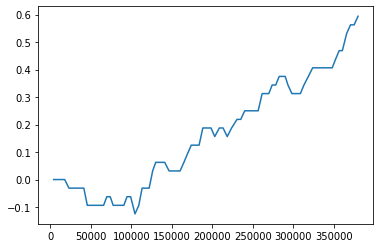

In [56]:
plt.plot(trades['5secFadePNL'])

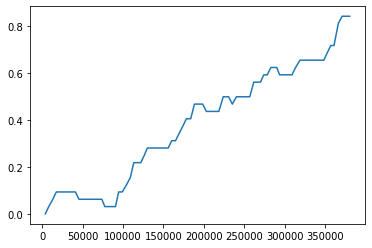

In [57]:
plt.plot(trades['10secFadePNL'])

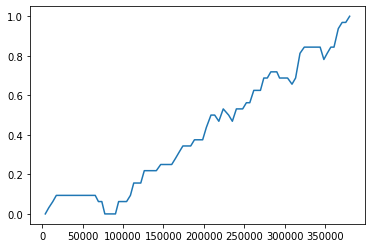

In [58]:
plt.plot(trades['20secFadePNL'])

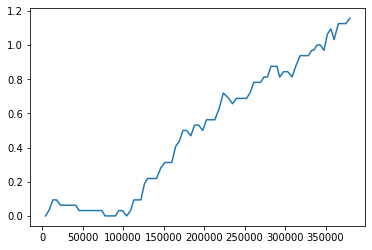

In [59]:
plt.plot(trades['45secFadePNL'])

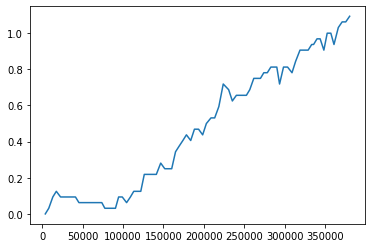

In [70]:
plt.plot(trades['60secFadePNL'])

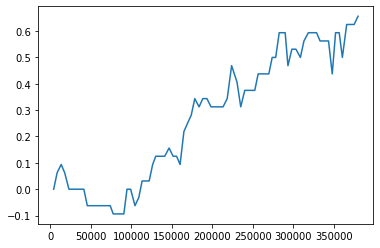

In [71]:
plt.plot(trades['120secFadePNL'])

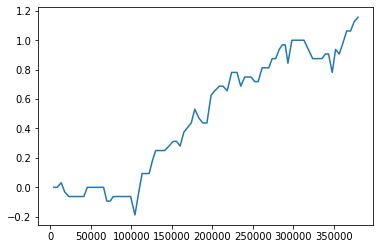

In [72]:
plt.plot(trades['300secFadePNL'])

In [73]:
trades

Date      Time       Open       High        Low       Last  \
3970    29/06/2020  20:00:00  179.00000  179.03125  179.00000  179.03125   
8261    30/06/2020  20:00:00  178.56250  178.59375  178.53125  178.56250   
13267   01/07/2020  20:00:00  178.12500  178.12500  178.09375  178.12500   
17589   02/07/2020  20:00:00  178.37500  178.37500  178.34375  178.34375   
22831   06/07/2020  20:00:00  177.96875  178.00000  177.96875  177.96875   
27009   07/07/2020  20:00:00  179.03125  179.03125  179.00000  179.03125   
31275   08/07/2020  20:00:00  178.93750  178.96875  178.90625  178.90625   
35924   09/07/2020  20:00:00  180.34375  180.37500  180.34375  180.34375   
41249   10/07/2020  20:00:00  179.81250  179.87500  179.81250  179.84375   
45517   13/07/2020  20:00:00  179.65625  179.65625  179.59375  179.59375   
50247   14/07/2020  20:00:00  180.28125  180.34375  180.28125  180.31250   
54513   15/07/2020  20:00:00  179.75000  179.75000  179.71875  179.75000   
58330   16/07/2020  20:00:00  180.21875  180.25000  180.18750  180.21875   
61868   17/07/2020  20:00:00  179.75000  179.75000  179.71875  179.71875   
65665   20/07/2020  20:00:00  180.00000  180.03125  180.00000  180.00000   
69618   21/07/2020  20:00:00  180.28125  180.28125  180.25000  180.28125   
73806   22/07/2020  20:00:00  180.62500  180.65625  180.59375  180.62500   
77527   23/07/2020  20:00:00  181.09375  181.09375  181.03125  181.06250   
82152   24/07/2020  20:00:00  181.12500  181.15625  181.09375  181.12500   
86247   27/07/2020  20:00:00  180.65625  180.68750  180.65625  180.68750   
90661   28/07/2020  20:00:00  181.43750  181.50000  181.43750  181.43750   
94568   29/07/2020  20:00:00  181.28125  181.31250  181.25000  181.25000   
99072   30/07/2020  20:00:00  182.34375  182.34375  182.31250  182.34375   
104414  31/07/2020  20:00:00  182.31250  182.37500  182.31250  182.37500   
109142  03/08/2020  20:00:00  181.56250  181.62500  181.56250  181.62500   
113247  04/08/2020  20:00:00  182.75000  182.81250  182.75000  182.78125   
117495  05/08/2020  20:00:00  182.06250  182.09375  182.06250  182.09375   
121931  06/08/2020  20:00:00  182.21875  182.25000  182.21875  182.25000   
126268  07/08/2020  20:00:00  181.56250  181.62500  181.56250  181.62500   
130044  10/08/2020  20:00:00  181.25000  181.28125  181.25000  181.28125   
135013  11/08/2020  20:00:00  179.15625  179.15625  179.12500  179.15625   
141152  12/08/2020  20:00:00  178.81250  178.84375  178.78125  178.84375   
146559  13/08/2020  20:00:00  177.78125  177.81250  177.75000  177.75000   
151566  14/08/2020  20:00:00  177.84375  177.87500  177.84375  177.84375   
155840  17/08/2020  20:00:00  178.34375  178.37500  178.34375  178.37500   
160143  18/08/2020  20:00:00  178.81250  178.81250  178.78125  178.78125   
164864  19/08/2020  20:00:00  178.43750  178.43750  178.40625  178.43750   
169333  20/08/2020  20:00:00  179.37500  179.37500  179.34375  179.37500   
173946  21/08/2020  20:00:00  179.62500  179.62500  179.59375  179.59375   
178321  24/08/2020  20:00:00  179.43750  179.43750  179.40625  179.43750   
183622  25/08/2020  20:00:00  178.53125  178.53125  178.50000  178.53125   
188235  26/08/2020  20:00:00  178.12500  178.15625  178.12500  178.15625   
193315  27/08/2020  20:00:00  176.40625  176.40625  176.37500  176.37500   
198379  28/08/2020  20:00:00  176.43750  176.43750  176.43750  176.43750   
202950  31/08/2020  20:00:00  175.75000  175.81250  175.75000  175.78125   
208658  01/09/2020  20:00:00  176.37500  176.37500  176.34375  176.37500   
213244  02/09/2020  20:00:00  177.18750  177.21875  177.15625  177.15625   
218362  03/09/2020  20:00:00  177.90625  177.93750  177.87500  177.93750   
223811  04/09/2020  20:00:00  175.34375  175.37500  175.34375  175.37500   
230480  08/09/2020  20:00:00  176.25000  176.28125  176.25000  176.28125   
235071  09/09/2020  20:00:00  175.68750  175.71875  175.68750  175.68750   
240048  10/09/2020  20:00:00  176.21875  176.28125  176.21875 